In [1]:
import os
import sys
import torch
from timeit import default_timer as timer
from datetime import timedelta

BASE_DIR = os.path.dirname('./')
ROOT_DIR = os.path.dirname(BASE_DIR)
sys.path.append(ROOT_DIR)

import yaml

from lib.common.helpers.dataloader_helper import build_dataloader
from lib.common.helpers.model_helper import build_model
from lib.common.helpers.visualization_helper import visualization
from lib.common.helpers.print_helper import PrintHelper

In [2]:
mode = 'test' # test, train
config = 'configs/kitti-dtr.yaml'
from lib.monoDTR.printer import Printer

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# load cfg
assert (os.path.exists(config))
cfg = yaml.load(open(config, 'r'), Loader=yaml.Loader)
  
#  build dataloader
dataset = build_dataloader(cfg['dataset'], mode)

# build model
model = build_model(cfg['model'])

printHelper = PrintHelper(dataset)
printer = Printer(cfg['model'], model)

Using device: cuda


In [3]:
idx = 0


7
[['Car', 0, 0, 4.4177995, 795.55493, 179.9665, 961.92365, 298.26898, 1.528776, 1.6558698, 3.6631463, 3.9437196, 1.6533077, 11.242016, 4.760104, 0.99999285], ['Car', 0, 0, 4.7050815, 664.0426, 177.68901, 701.6983, 215.3614, 1.6205795, 1.6578803, 3.8922968, 3.3751805, 1.8668039, 33.684544, 4.8067746, 0.99975544], ['Car', 0, 0, 4.5567713, 745.4773, 184.94383, 815.5899, 236.36972, 1.4334164, 1.5770273, 3.7986686, 5.239343, 1.842016, 22.762566, 4.785597, 0.999485], ['Car', 0, 0, 1.4948379, 738.315, 184.28142, 788.43506, 225.54483, 1.4554777, 1.5747823, 3.5591834, 5.953624, 1.9381255, 28.340347, 1.7040027, 0.90729696]]
0:00:00.077345


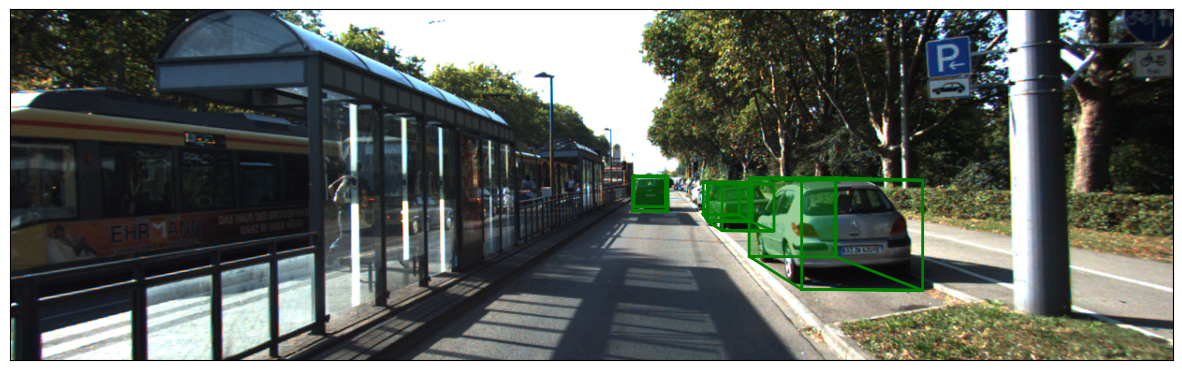

In [11]:
print(idx)

for x in range(1):
    img, calibs = printHelper.getPrintables(idx)

    torch.cuda.synchronize() # Wait for all kernels in all streams on a CUDA device to complete.
    start_time = timer()
    
    preds = printer.print(img, calibs)
    print(preds)

    torch.cuda.synchronize() # Wait for all kernels in all streams on a CUDA device to complete.
    end_time = timer()
    print(timedelta(seconds=end_time - start_time))
    
    visualization(img, calibs, preds, False)
    idx = idx +1